# Action Recognition with ResNet

In [1]:
from torch.utils.data import DataLoader
from main import Stanford40Dataset
from torchvision import transforms
import torch

## Prepare image transformation and constants

In [2]:
# Transforms and constant definition
# Define transformations (resize, normalization, etc.)
transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomApply([
        transforms.ColorJitter(0.4, 0.4, 0.4, 0.1)], p=0.8
    ),
    transforms.RandomGrayscale(0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# Paths to the image directory (data/train and data/test)
data_dir = 'data'
LR = 1e-3
BATCH_SIZE = 196
EPOCHS = 25
TRAIN_SPLIT = 0.75
VAL_SPLIT = 1 - TRAIN_SPLIT

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


## Load dataset

In [3]:
from torch.utils.data import random_split

# Instantiate the dataset and data loaders
train_dataset = Stanford40Dataset(data_dir=data_dir, split='train', transform=transform)
test_dataset = Stanford40Dataset(data_dir=data_dir, split='test', transform=transform)

numTrainSamples = int(len(train_dataset) * TRAIN_SPLIT)
numValSamples = int(len(train_dataset) * VAL_SPLIT)
(trainData, valData) = random_split(train_dataset,
                                    [numTrainSamples, numValSamples],
                                    generator=torch.Generator().manual_seed(42))

train_loader = DataLoader(trainData, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)
val_loader = DataLoader(valData, batch_size=BATCH_SIZE)


Loaded 4000 images from train split.
Loaded 5532 images from test split.


## Instantiate ResNet model

In [4]:
from torch import optim, nn
from CustomResNet import CustomResNet

#Define model
# Create an instance of the model class and allocate it to the device
model = CustomResNet().to(device)

print(model)

optimizer = optim.Adam(model.parameters(), lr=LR)
loss_criteria = nn.CrossEntropyLoss()


C:\Users\User\Desktop\NACHO\UNI\MASTER\AVPR\Assignment 2\imageClassifier\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\User\Desktop\NACHO\UNI\MASTER\AVPR\Assignment 2\imageClassifier\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


CustomResNet(
  (resnet): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track

## Training loop

Epoch 1/25
Epoch: 1


Epoch 1: 100%|██████████| 16/16 [01:49<00:00,  6.86s/it, loss=3.37]


Training set: Average loss: 3.503114
Validation set: Average loss: 4.222931, Accuracy: 64/1000 (6%)

Epoch 2/25
Epoch: 2


Epoch 2: 100%|██████████| 16/16 [01:41<00:00,  6.35s/it, loss=3]   


Training set: Average loss: 3.126048
Validation set: Average loss: 3.555016, Accuracy: 135/1000 (14%)

Epoch 3/25
Epoch: 3


Epoch 3: 100%|██████████| 16/16 [01:44<00:00,  6.56s/it, loss=2.57]


Training set: Average loss: 2.872723
Validation set: Average loss: 3.411521, Accuracy: 169/1000 (17%)

Epoch 4/25
Epoch: 4


Epoch 4: 100%|██████████| 16/16 [01:49<00:00,  6.82s/it, loss=2.48]


Training set: Average loss: 2.671909
Validation set: Average loss: 3.815518, Accuracy: 136/1000 (14%)

Epoch 5/25
Epoch: 5


Epoch 5: 100%|██████████| 16/16 [01:49<00:00,  6.85s/it, loss=2.71]


Training set: Average loss: 2.537935
Validation set: Average loss: 3.277032, Accuracy: 192/1000 (19%)

Epoch 6/25
Epoch: 6


Epoch 6: 100%|██████████| 16/16 [01:46<00:00,  6.68s/it, loss=2.22]


Training set: Average loss: 2.391242
Validation set: Average loss: 2.749348, Accuracy: 250/1000 (25%)

Epoch 7/25
Epoch: 7


Epoch 7: 100%|██████████| 16/16 [01:49<00:00,  6.83s/it, loss=2.57]


Training set: Average loss: 2.285813
Validation set: Average loss: 2.804768, Accuracy: 251/1000 (25%)

Epoch 8/25
Epoch: 8


Epoch 8: 100%|██████████| 16/16 [01:44<00:00,  6.56s/it, loss=1.99]


Training set: Average loss: 2.154814
Validation set: Average loss: 3.102586, Accuracy: 224/1000 (22%)

Epoch 9/25
Epoch: 9


Epoch 9: 100%|██████████| 16/16 [01:45<00:00,  6.61s/it, loss=1.95]


Training set: Average loss: 2.071095
Validation set: Average loss: 2.862027, Accuracy: 275/1000 (28%)

Epoch 10/25
Epoch: 10


Epoch 10: 100%|██████████| 16/16 [01:47<00:00,  6.69s/it, loss=2.11]


Training set: Average loss: 1.950004
Validation set: Average loss: 2.811796, Accuracy: 293/1000 (29%)

Epoch 11/25
Epoch: 11


Epoch 11: 100%|██████████| 16/16 [01:45<00:00,  6.62s/it, loss=1.62]


Training set: Average loss: 1.861230
Validation set: Average loss: 2.887288, Accuracy: 287/1000 (29%)

Epoch 12/25
Epoch: 12


Epoch 12: 100%|██████████| 16/16 [01:47<00:00,  6.70s/it, loss=2.02]


Training set: Average loss: 1.799866
Validation set: Average loss: 2.737565, Accuracy: 327/1000 (33%)

Epoch 13/25
Epoch: 13


Epoch 13: 100%|██████████| 16/16 [01:49<00:00,  6.87s/it, loss=1.89]


Training set: Average loss: 1.715259
Validation set: Average loss: 2.652023, Accuracy: 317/1000 (32%)

Epoch 14/25
Epoch: 14


Epoch 14: 100%|██████████| 16/16 [02:01<00:00,  7.59s/it, loss=1.62]


Training set: Average loss: 1.636475
Validation set: Average loss: 2.806637, Accuracy: 329/1000 (33%)

Epoch 15/25
Epoch: 15


Epoch 15: 100%|██████████| 16/16 [02:33<00:00,  9.59s/it, loss=1.48]


Training set: Average loss: 1.546565
Validation set: Average loss: 2.759647, Accuracy: 314/1000 (31%)

Epoch 16/25
Epoch: 16


Epoch 16: 100%|██████████| 16/16 [02:33<00:00,  9.61s/it, loss=1.31]


Training set: Average loss: 1.487590
Validation set: Average loss: 2.655281, Accuracy: 334/1000 (33%)

Epoch 17/25
Epoch: 17


Epoch 17: 100%|██████████| 16/16 [02:29<00:00,  9.35s/it, loss=1.44]


Training set: Average loss: 1.470748
Validation set: Average loss: 2.495661, Accuracy: 349/1000 (35%)

Epoch 18/25
Epoch: 18


Epoch 18: 100%|██████████| 16/16 [02:29<00:00,  9.37s/it, loss=1.37]


Training set: Average loss: 1.385672
Validation set: Average loss: 2.686236, Accuracy: 308/1000 (31%)

Epoch 19/25
Epoch: 19


Epoch 19: 100%|██████████| 16/16 [02:31<00:00,  9.49s/it, loss=1.42]


Training set: Average loss: 1.337333
Validation set: Average loss: 2.834504, Accuracy: 339/1000 (34%)

Epoch 20/25
Epoch: 20


Epoch 20: 100%|██████████| 16/16 [02:33<00:00,  9.59s/it, loss=1.54]


Training set: Average loss: 1.314526
Validation set: Average loss: 2.572985, Accuracy: 339/1000 (34%)

Epoch 21/25
Epoch: 21


Epoch 21: 100%|██████████| 16/16 [02:31<00:00,  9.47s/it, loss=1.3] 


Training set: Average loss: 1.254583
Validation set: Average loss: 2.801789, Accuracy: 321/1000 (32%)

Epoch 22/25
Epoch: 22


Epoch 22: 100%|██████████| 16/16 [02:32<00:00,  9.52s/it, loss=1.23]


Training set: Average loss: 1.173958
Validation set: Average loss: 2.423302, Accuracy: 379/1000 (38%)

Epoch 23/25
Epoch: 23


Epoch 23: 100%|██████████| 16/16 [02:31<00:00,  9.45s/it, loss=1.19]


Training set: Average loss: 1.113268
Validation set: Average loss: 2.507444, Accuracy: 347/1000 (35%)

Epoch 24/25
Epoch: 24


Epoch 24: 100%|██████████| 16/16 [02:31<00:00,  9.49s/it, loss=1.3] 


Training set: Average loss: 1.134587
Validation set: Average loss: 2.639186, Accuracy: 339/1000 (34%)

Epoch 25/25
Epoch: 25


Epoch 25: 100%|██████████| 16/16 [02:20<00:00,  8.78s/it, loss=1.09]


Training set: Average loss: 1.056720
Validation set: Average loss: 2.610895, Accuracy: 365/1000 (36%)



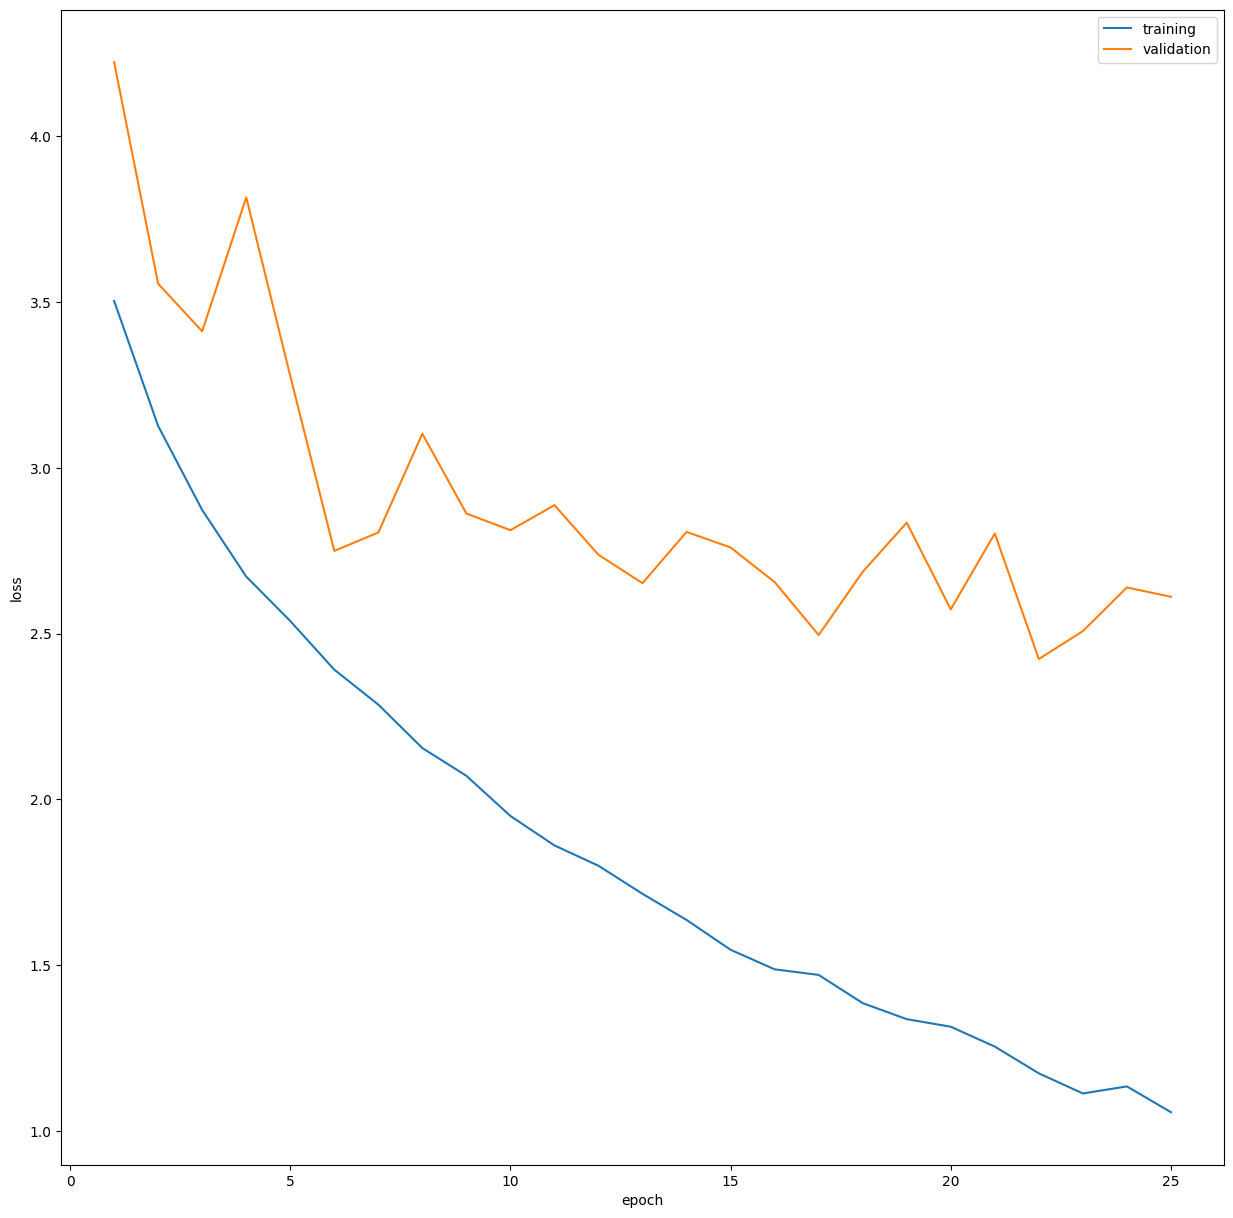

In [5]:
from TrainTestUtils import train, validate, plot_loss

epoch_nums = []
training_loss = []
validation_loss = []

for epoch in range(1, EPOCHS + 1):
    print(f"Epoch {epoch}/{EPOCHS}")
    # Call the train function
    train_loss = train(model, device, loss_criteria, train_loader, optimizer, epoch)
    # Call the validation function
    val_loss = validate(model, device, loss_criteria, val_loader)

    # Track losses and epochs
    epoch_nums.append(epoch)
    training_loss.append(train_loss)
    validation_loss.append(val_loss)
    
plot_loss(epoch_nums, training_loss, validation_loss)

## Testing (performing predictions)

In [6]:
from TrainTestUtils import make_predictions, compute_accuracy

#Testing
print("Evaluating on the test set...")
truelabels, predictions = make_predictions(model, test_loader, device)

# Compute and display accuracy
accuracy = compute_accuracy(truelabels, predictions)
print(f"Test Set Accuracy: {accuracy:.2f}%")

Evaluating on the test set...
Test Set Accuracy: 36.32%
